In [1]:
# -*- coding:utf-8 -*-
# Author:凌逆战 | Never
# Date: 2023/6/29
"""
调用scipy.signal设计滤波器, 并画出频率响应曲线
"""
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#打印小数点后13位
np.set_printoptions(precision=13)

b [ 0.9862119246271 -1.9724238492542  0.9862119246271]
a [ 1.              -1.9722337291953  0.9726139693131]
<class 'numpy.ndarray'>
sos [[ 0.9862119246271 -1.9724238492542  0.9862119246271  1.
  -1.9722337291953  0.9726139693131]]


C:\Users\never\AppData\Local\Temp\ipykernel_23584\455527313.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(0.5 * fs * w / np.pi, 20*np.log10(h))  # 0.5*fs*w/np.pi 为频率
C:\Users\never\AppData\Local\Temp\ipykernel_23584\455527313.py:23: RuntimeWarning: invalid value encountered in multiply
  plt.plot(0.5 * fs * w / np.pi, 20*np.log10(h))  # 0.5*fs*w/np.pi 为频率
C:\Users\never\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


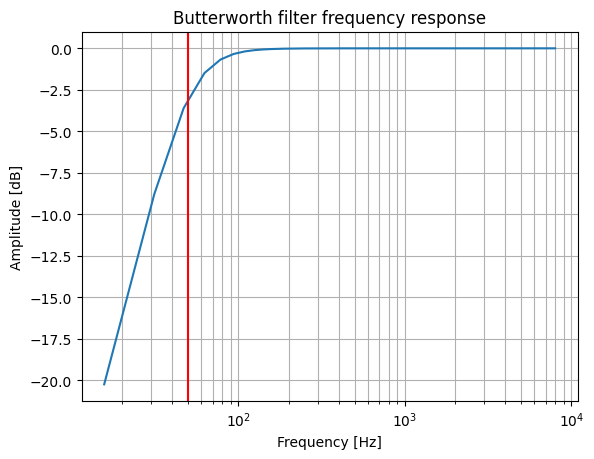

In [3]:
fs = 16000
fc = 50  # 截止频率

# butter
b, a = signal.butter(2, fc, btype='highpass', analog=False, output='ba', fs=fs)
print("b", b)
print("a", a)
# b [ 0.98075006 -1.96150012  0.98075006]
# a [ 1.         -1.96112953  0.96187072]
# ba to sos
sos = signal.butter(2, fc, btype='highpass', analog=False, output='sos', fs=fs)
print("sos", sos)
# cheby1
# b,a = signal.cheby1(N=6, rp=30, Wn=fc/fs, btype='highpass', analog=False, output='ba')
# cheby2
# b,a = signal.cheby2(N=6, rs=70, Wn=fc/fs, btype='highpass', analog=False, output='ba')

# 滤波
# y = signal.filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)

w, h = signal.freqz(b, a)  # 根据系数计算滤波器的频率响应, w是角频率, h是频率响应
plt.plot(0.5 * fs * w / np.pi, 20*np.log10(h))  # 0.5*fs*w/np.pi 为频率
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')  # 显示网格
# 画红色的垂直线, 标记截止频率
plt.axvline(fc, color='red')
plt.xscale('log')  # x轴对数化
plt.show()